Nicholas Paisley - Project 3 - Part 1

## Pima Indians - diabetes prediction
## Neural Network for binary classification

Diabetes Prediction

The first dataset and incomplete notebook is for data relating to Pima Indians. The features are in columns 0-7 (Number of times pregnant, Plasma glucose concentration, diastolic blood pressure, triceps skin fold thickness, 2-hour serum insulin, body mass index, diabetes pedigree function, Age) and the single target is in the last column and indicates whether or not the individual developed diabetes in five years (yes/no indicated by 1/0). Create a neural network to predict whether or not an individual develops diabetes in five years based on the features.
Tips: Use two hidden layers of 12 and 8 neurons. Make sure your final single target neuron has a sigmoid activation function. Use 'binary_crossentropy' for your loss function.

For Project 3 please submit:
1. Your commented, working codes for each problem. Comments should explain what is going on in the algorithm. Output from model.fit() must be suppressed using verbose=0. See above. Submissions that do not do this will be downgraded by 50%.
2. Demonstrations of your code results including:

a. An evaluation of your NNs accuracy; how well does it predict the observed targets based on the features as inputs. Create a nice visualization showing this.*

EPOCH 500 LEARNING RATE 0.01    - 80.86%

EPOCH 500 LEARNING RATE 0.001   - 79.56%

EPOCH 500 LEARNING RATE 0.0001  - 74.09%

EPOCH 1500 LEARNING RATE 0.01   - 79.56%

EPOCH 1500 LEARNING RATE 0.001  - 81.38%

EPOCH 1500 LEARNING RATE 0.0001 - 75.52%

EPOCH 3000 LEARNING RATE 0.01   - 78.52%

EPOCH 3000 LEARNING RATE 0.001  - 82.55%

EPOCH 3000 LEARNING RATE 0.0001 - 78.65%

There are visualizations created at the end of each section of code. The best one that I was able to get was EPOCH 3000 LEARNING RATE 0.001  - 82.55%.

b. Graphs demonstrating how the loss decreases and the accuracy increases with each iteration (epoch). Do this for three different learning rates to show how convergence depends on learning rate with this algorithm.*

This is done at the end of each section of code. Please see at the end of each section for visualization.

c. Describe what a confusion matrix is in your own words and comment on the confusion matrices for each of your problems.

This is commented within the code. Please refer to the explanation there. 

d. Bonus: can you compare how binary cross-entropy compares with just using mean squared error.

As always this should all be submitted in a pdf.
*All visualizations should adhere to Tufte's principles, be labeled and captioned. Please engage your creativity to produce a beautiful visualization.
           

EPOCH 500 LEARNING RATE 0.01


accuracy: 80.86%
Confusion Matrix
True negatives:  460
False negatives:  107
False positives:  40
True positives:  161
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:

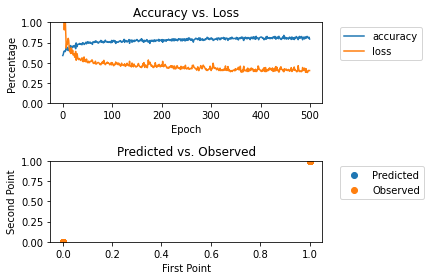

In [55]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.01) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 40  161 - TP  
# TN - 460  107 - FN 

#Accuracy = 80.86%

###Analysis of CM: ###
# This is based off of EPOCH=500 and LR=0.01. Unfortunately there are a lot of false negatives in this batch and that is an issue. The NN is only right roughly 80% of the time. 
# This is probably because of the low EPOCH and the learning rate. Once adjusted, it may adjust to a higher accuracy. This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 500 LEARNING RATE 0.001


accuracy: 79.56%
Confusion Matrix
True negatives:  458
False negatives:  115
False positives:  42
True positives:  153
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:

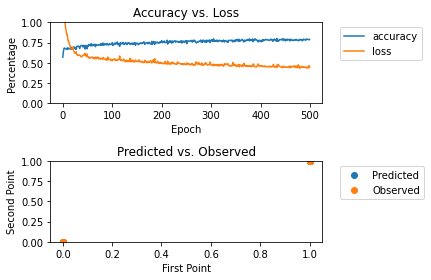

In [56]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 42  153 - TP  
# TN - 458  115 - FN 

#Accuracy = 79.56%

###Analysis of CM: ###
# This is based off of EPOCH=500 and LR=0.001. Unfortunately there are a lot of false negatives in this batch as well, in fact more than the last one. The NN is only right roughly 80% of the time. 
# This is probably because of the low EPOCH and the learning rate. This maybe overfitting the learning rate. Once adjusted, it may adjust to a higher accuracy. This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 500 LEARNING RATE 0.0001


accuracy: 74.09%
Confusion Matrix
True negatives:  423
False negatives:  122
False positives:  77
True positives:  146
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:

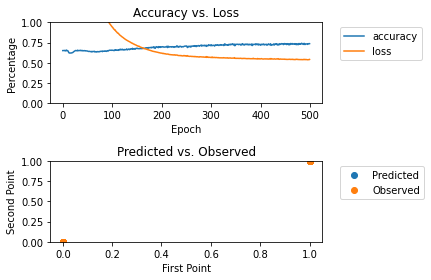

In [57]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.0001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 77  146 - TP  
# TN - 423  122 - FN 

#Accuracy = 74.09%

###Analysis of CM: ###
# This is based off of EPOCH=500 and LR=0.0001. Unfortunately there are a lot of false negatives in this batch as well, in fact more than the last one (out of all the ALL the runs, this one is the worst)
# The NN is only right less than 75% of the time (which is the worst out of ALL the runs)
# This is probably because of the low EPOCH and the learning rate. This maybe overfitting the learning rate. Once adjusted, it may adjust to a higher accuracy. 
# This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 1500 LEARNING RATE 0.01


accuracy: 79.56%
Confusion Matrix
True negatives:  452
False negatives:  109
False positives:  48
True positives:  159
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:

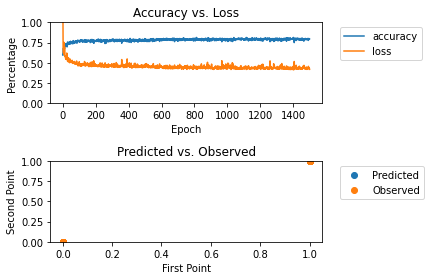

In [58]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.01) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=1500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

###Analysis of CM: ###
# This is based off of EPOCH=1500 and LR=0.01. Unfortunately there are a lot of false negatives in this batch. The NN is only right roughly 80% of the time. 
# This is probably because of the low EPOCH and the learning rate. Once adjusted, it may adjust to a higher accuracy. 

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 48  159 - TP  
# TN - 452  109 - FN 

#Accuracy = 79.56%

###Analysis of CM: ###
# This is based off of EPOCH=1500 and LR=0.01. Unfortunately there are a lot of false negatives in this batch. The NN is only right roughly 80% of the time. 
# This is probably because of the low EPOCH and the learning rate. Once adjusted, it may adjust to a higher accuracy. This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   
    
#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 1500 LEARNING RATE 0.001


accuracy: 81.38%
Confusion Matrix
True negatives:  454
False negatives:  97
False positives:  46
True positives:  171
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted: 

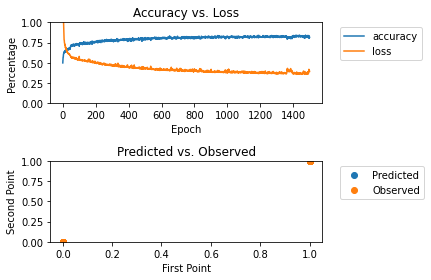

In [59]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=1500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 46  171 - TP  
# TN - 454  97 - FN 

#Accuracy = 81.38%

###Analysis of CM: ###
# This is based off of EPOCH=1500 and LR=0.001. Unfortunately there are a lot of false negatives in this batch as well (however, this run did have below 100 FN results).
# The NN is only right roughly a little over 80% of the time. 
# This is probably because of the low EPOCH and the learning rate.Once adjusted, it may adjust to a higher accuracy. 
# This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 1500 LEARNING RATE 0.0001


accuracy: 75.52%
Confusion Matrix
True negatives:  439
False negatives:  127
False positives:  61
True positives:  141
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:

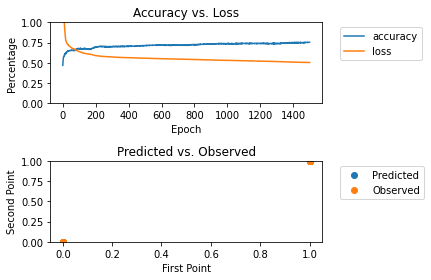

In [60]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.0001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=1500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 61  141 - TP  
# TN - 439  127 - FN 

#Accuracy = 75.52%

###Analysis of CM: ###
# This is based off of EPOCH=1500 and LR=0.0001. Unfortunately there are a lot of false negatives in this batch as well. This is the worst one in the EPOCH=1500.
# The NN is only right roughly 75% of the time. 
# This is probably because of the low EPOCH and the learning rate. This maybe overfitting the learning rate. Once adjusted, it may adjust to a higher accuracy. 
# This could also be attributed to the targets and features that are being used as well.


for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 3000 LEARNING RATE 0.01


accuracy: 78.52%
Confusion Matrix
True negatives:  422
False negatives:  87
False positives:  78
True positives:  181
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted: 

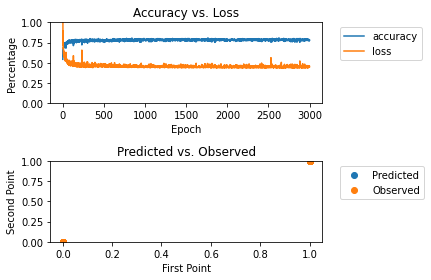

In [61]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.01) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=3000, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 78  181 - TP  
# TN - 422  87 - FN 

#Accuracy = 78.52%

###Analysis of CM: ###
# This is based off of EPOCH=3000 and LR=0.01. Unfortunately there are a lot of false negatives in this batch as well (This does have less than 100 FN in it) 
# The NN is only right roughly 78-79% of the time. 
# This is probably because of the low EPOCH and the learning rate. This maybe overfitting the learning rate. Once adjusted, it may adjust to a higher accuracy. 
# This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 3000 LEARNING RATE 0.001


accuracy: 82.55%
Confusion Matrix
True negatives:  408
False negatives:  42
False positives:  92
True positives:  226
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  0.0
Predicted: 

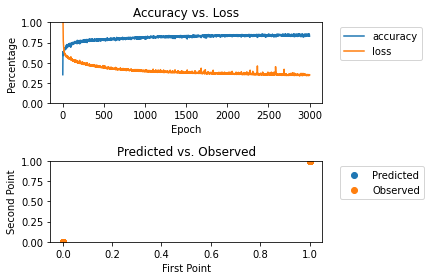

In [62]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=3000, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 92  226 - TP  
# TN - 408  42 - FN 

#Accuracy = 82.55%

###Analysis of CM: ###
# This is based off of EPOCH=3000 and LR=0.001. This is the best out of ALL of the runs (This does have less than 50 FN in it) 
# The NN is only right roughly 82-83% of the time. (Again, the best out of all of the runs completed)
# The accuracy, although the best, is still low probably because of the low EPOCH and the learning rate. This maybe overfitting the learning rate. Once adjusted, it may adjust to a higher accuracy. 
# This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 3000 LEARNING RATE 0.0001


accuracy: 78.65%
Confusion Matrix
True negatives:  446
False negatives:  110
False positives:  54
True positives:  158
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  1.0
Predicted:  1 Observed:  1.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:  0 Observed:  0.0
Predicted:

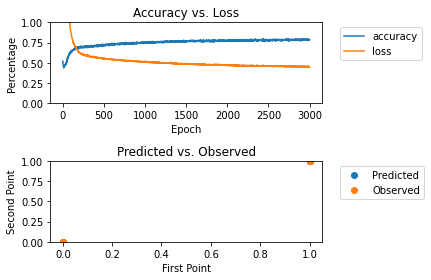

In [63]:
# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(12, input_dim=8, activation='relu'))
#hidden layer: 12 (taking in 8 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(8, activation='relu')) #Hidden Layer: 8, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.0001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=3000, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 54  158 - TP  
# TN - 446  110 - FN 

#Accuracy = 78.65%

###Analysis of CM: ###
# This is based off of EPOCH=3000 and LR=0.0001. Unfortunately there are a lot of false negatives in this batch as well (over 100)
# The NN is only right less than 78-79% of the time.
# This is probably because of the low EPOCH and the learning rate. This maybe overfitting the learning rate. Once adjusted, it may adjust to a higher accuracy. 
# This could also be attributed to the targets and features that are being used as well.

for i in range(768): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   